In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [15]:
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

<function matplotlib.pyplot.show(*args, **kw)>

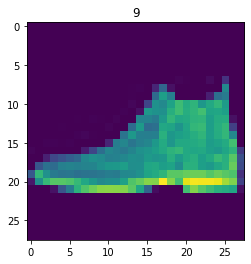

In [16]:
plt.imshow(x_test[0])
plt.title(y_test[0])
plt.show

In [17]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [18]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Subclass Model

In [ ]:
class FashionMnistModel(tf.keras.Model):
    def __init__(self):
        super(FashionMnistModel, self).__init__()
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(128, activation='relu')
        self.d2 = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y
    
model = FashionMnistModel()

# Sequential Model

In [19]:
model = tf.keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), validation_freq=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5020 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.4310 - val_sparse_categorical_accuracy: 0.8481
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3783 - sparse_categorical_accuracy: 0.8635 - val_loss: 0.4024 - val_sparse_categorical_accuracy: 0.8521
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3389 - sparse_categorical_accuracy: 0.8760 - val_loss: 0.3849 - val_sparse_categorical_accuracy: 0.8600
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3133 - sparse_categorical_accuracy: 0.8842 - val_loss: 0.3495 - val_sparse_categorical_accuracy: 0.8718
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2957 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.3636 - val_sparse_categorical_accuracy: 0.8672
Epoch 6/10
6000

In [ ]:
model.summary()